In [39]:
# load and plot dataset

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# convert date time
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

series = pd.read_csv('../dataset/shampoo.csv', sep= '\t', index_col=0)
series.head()

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


<Axes: xlabel='Month'>

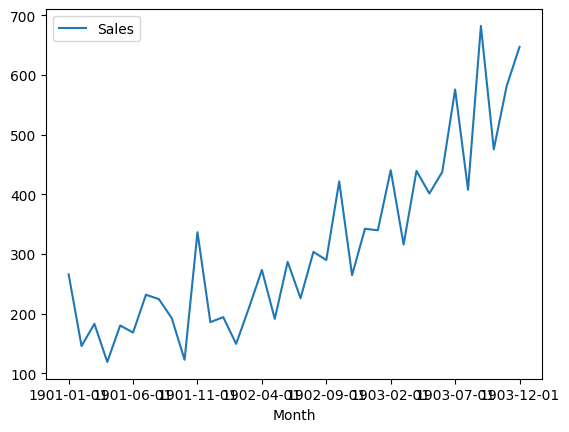

In [40]:
series.plot()

In [41]:
# split data into train and test
data = series.values
train, test = data[:24], data[24:]

RMSE: 136.761


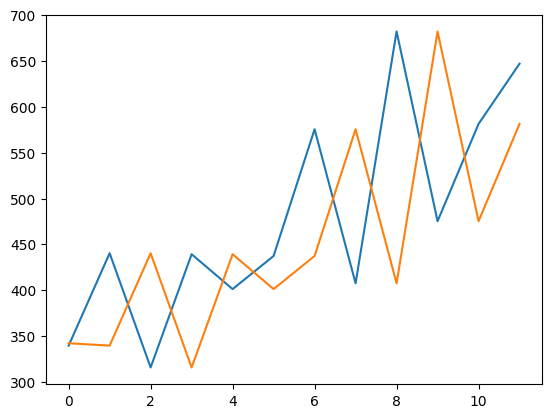

In [42]:
from sklearn.metrics import mean_squared_error
import numpy as np

lag= np.concatenate((train[[-1]], test[:-1]), axis = 0)
# report performance
rmse = np.sqrt(mean_squared_error(test, lag))
print('RMSE: %.3f' % rmse)
# line plot of observed vs predicted
plt.plot(test)
plt.plot(lag)

In [43]:
# tạo hàm chứa giá trị chuỗi và trễ
def timeseries_to_supervised(data, lag = 1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(0, lag+1)]
    colnames = ['X'+str(i) for i in range(0, lag+1)]
    df = pd.concat(columns, axis = 1)
    df.columns = colnames
    df.fillna(0, inplace = True)
    return df

In [44]:
def difference(dataset, interval = 1):
    return dataset.diff(interval).iloc[1:,:]

<Axes: xlabel='Month'>

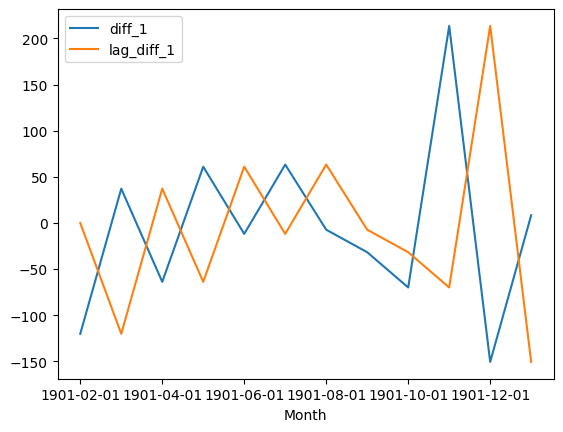

In [45]:
# data = timeseries_to_supervised(series)
diff = difference(series, interval = 1)
data = timeseries_to_supervised(diff)
data.columns = ['diff_1', 'lag_diff_1']
data.iloc[:12, :].plot()

In [46]:
from sklearn.preprocessing import MinMaxScaler
data = data.values
scaler = MinMaxScaler(feature_range = (-1, 1))
fit = scaler.fit(data)
data_scale = fit.transform(data)
data_scale[:5]

array([[-0.63999169, -0.14071919],
       [ 0.01392642, -0.63999169],
       [-0.40594471,  0.01392642],
       [ 0.11286635, -0.40594471],
       [-0.18977344,  0.11286635]])

In [47]:
data[:2]

array([[-120.1,    0. ],
       [  37.2, -120.1]])

In [48]:
fit.inverse_transform(data_scale[:2])

array([[-120.1,    0. ],
       [  37.2, -120.1]])

In [49]:
train, test = data[0:-12], data[-12:]

In [50]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(train)
train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)
train_scaled[:5]

array([[-0.80037766, -0.15241435],
       [ 0.04828702, -0.80037766],
       [-0.496628  ,  0.04828702],
       [ 0.17669274, -0.496628  ],
       [-0.21607769,  0.17669274]])

In [72]:
# Lấy các giá trị của predictor X và output y. Reshape lại X để phù hợp với batch_size_input
X_train, y_train = train_scaled[:, 1:], train_scaled[:, 0]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_train.shape

(23, 1, 1)

In [ ]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

# 1. Khởi tạo network
batch_size = 1
timesteps = X_train.shape[1]
features = X_train.shape[2]

model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, timesteps, features), stateful=True))
model.add(Dense(1, activation='linear'))

# 2. Xây dựng thuật toán gradient cập nhật dữ liệu
model.compile(loss='mean_squared_error', optimizer='adam')


ValueError: Unrecognized keyword arguments passed to LSTM: {'batch_input_shape': (1, 1, 1)}